![](./img/practica7/5abc.png)

**a )**

> | Estimadores |
> |---|
> |$$\huge \hat \theta_m = \hat \theta_{MV} = \bar X = \frac {\sum_{i=1}^n X_i} n$$|

**b )**

Sabiendo que la distribución de las $X_i$ es $Poisson(\theta)$, podemos usar la función de probabilidad puntual de la misma, reemplazando $\theta$ por $\hat \theta_m$

> PMF: **Poisson ($\theta$)**
>
> $$\large P( X = x ) = \frac{\theta^x}{x!} e^{-\theta}$$

Para $X=40$

> $$\large P( X = 40 ) = \frac{\theta^{\, 40}}{40!} e^{-\theta}$$

A modo de procedimiento *plug in*, uso parámetro $\hat \theta_m$ estimado:



> | Estimador de $p_X(40)$ |
> |---|
> |$$\huge \hat P_m( X = 40 ) = \frac{\hat \theta_m^{\, 40}}{40!} e^{-\hat \theta_m}$$|

**c )** Si no conociera la distribución de las $X_i$, puedo aproximar la distribución por una binomial con probabilidad $p$ estimada con los datos:

> PMF Binomial(n,p)
>
> $$\large P(X=k) = {n \choose k} p^k (1 - p)^{n-k}$$


Ahora 

* La **cantidad de llamados en un día**, puede ser aproximada por el **promedio de los datos de todos los días**.


* Quisiera una **probabilidad estimada** a partir de las $\sim 40$ llamadas por día, pero necesito que sea un valor menor a 1.


* Para eso, expreso ***DÍA*** en ***MINUTOS***:

> $$1 \ dia = 1440 \  min$$
 
De esta forma, con $\bar X$ el promedio de llamados por día, la probabilidad estimada será de

> $$\hat p = \frac {\bar X}{1440}$$

De nuevo, por procedimiento *plug in*:

> $$P(X=k) = {n \choose k} p^{\ k} (1 - p)^{n-k}$$

> $$\hat P(X=k) = {n \choose k} \hat p^{\ k} (1 - \hat p)^{n-k}$$


> $$\hat P(X=k) = {1440 \choose k} \left( \frac {\bar X}{1440}\right)^k \left( 1 - \frac {\bar X}{1440}\right)^{1440-k}$$

Y si buscamos estimar la probabilidad de exactamente 40 llegadas:

> | Estimador de $p_X(40)$ |
> |---|
> |$$\huge \hat P(X=40) = {1440 \choose 40} \left( \frac {\bar X}{1440}\right)^{40} \left( 1 - \frac {\bar X}{1440}\right)^{1400}$$|

![](./img/practica7/5de.png)

Para **d )**, uso valores del sitio (bajados a `data/practica7`)

In [147]:
data_n5 <- read.csv("./data/practica7/datos_Practica7_ej5_n_5.csv")
data_n50 <- read.csv("./data/practica7/datos_Practica7_ej5_n_50.csv")
data_n100 <- read.csv("./data/practica7/datos_Practica7_ej5_n_100.csv")
head(data_n100)

llamadas
38
31
40
43
44
52


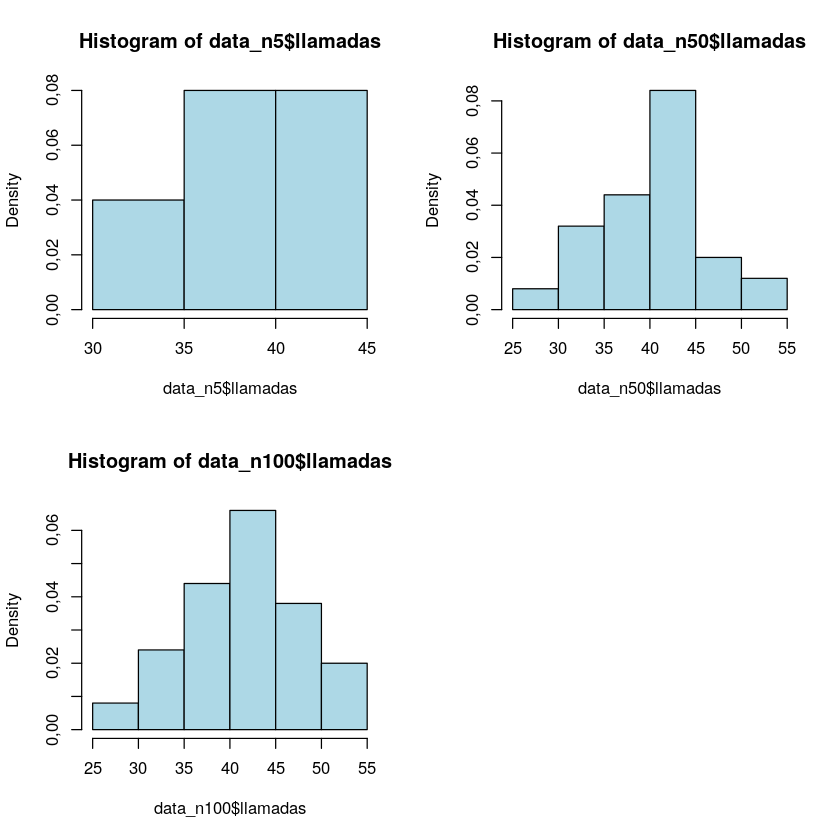

In [148]:
par(mfrow=c(2,2))
hist(data_n5$llamadas, prob=TRUE, col='lightblue')
hist(data_n50$llamadas, prob=TRUE, col='lightblue')
hist(data_n100$llamadas, prob=TRUE, col='lightblue')

In [149]:
# Thetas estimados:
theta_n5 <- mean(data_n5$llamadas)
theta_n50 <- mean(data_n50$llamadas)
theta_n100 <- mean(data_n100$llamadas)
theta_n5
theta_n50
theta_n100

[1] 39,2

[1] 41,1

[1] 42,11

In [150]:
poissonPMF <- function(theta, k=40){
    return (( theta^k / factorial(k) ) * exp(-theta))
}

poissonPMF(theta_n5)
poissonPMF(theta_n50)
poissonPMF(theta_n100)

[1] 0,06243871

[1] 0,06201898

[1] 0,05965186

[1] 0,9999999

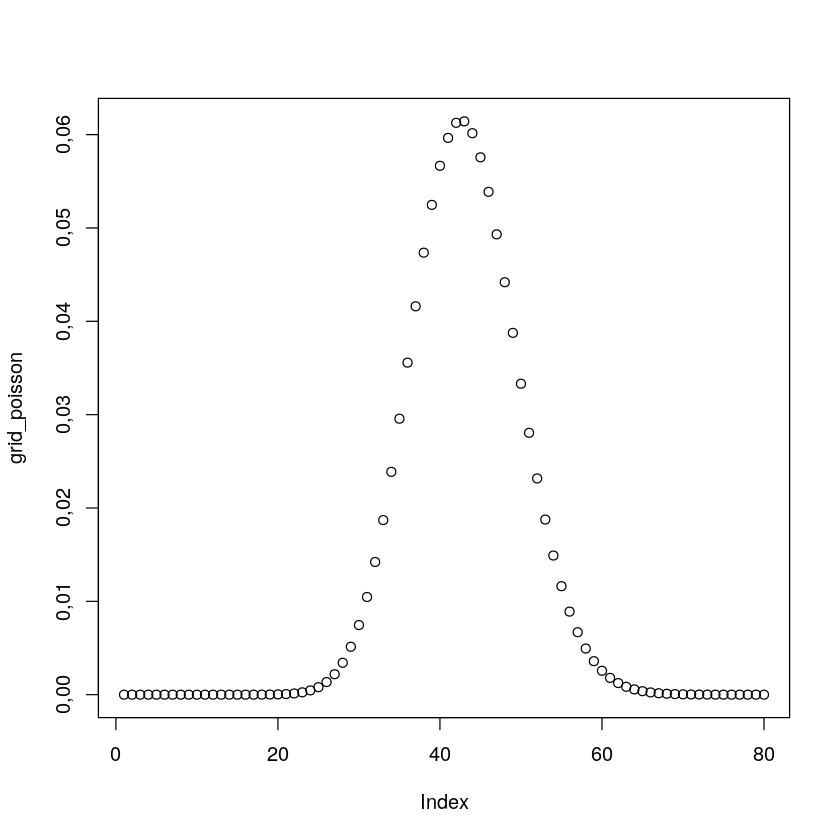

In [151]:
grid_poisson <- numeric(80)
for(k in 0:79){
    grid_poisson[k+1] <- poissonPMF(theta_n100, k)
}

# Chequeo valores:
sum(grid_poisson)
plot(grid_poisson)

In [152]:
binomialPMF <- function(n, p, k){
    return (choose(n, k) * p^k * (1-p)^(n-k))
}

# Probas estimadas en minutos por dia
p_hat_n5_min <- theta_n5 / (24*60)
p_hat_n50_min <- theta_n50 / (24*60)
p_hat_n100_min <- theta_n100 / (24*60)

p_hat_n5_min
p_hat_n50_min
p_hat_n100_min

[1] 0,02722222

[1] 0,02854167

[1] 0,02924306

In [153]:
binomialPMF(24*60, p_hat_n5_min, 40)
binomialPMF(24*60, p_hat_n50_min, 40)
binomialPMF(24*60, p_hat_n100_min, 40)

[1] 0,06330984

[1] 0,06287143

[1] 0,06040171

Y si uso segundos en vez de minutos

86400 segundos por dia

In [154]:
# Probas estimadas en segundos por dia
p_hat_n5_seg <- theta_n5 / (24*60*60)
p_hat_n50_seg <- theta_n50 / (24*60*60)
p_hat_n100_seg <- theta_n100 / (24*60*60)

p_hat_n5_seg
p_hat_n50_seg
p_hat_n100_seg

[1] 0,0004537037

[1] 0,0004756944

[1] 0,0004873843

In [155]:
binomialPMF(24*60*60, p_hat_n5_seg, 40)
binomialPMF(24*60*60, p_hat_n50_seg, 40)
binomialPMF(24*60*60, p_hat_n100_seg, 40)

[1] 0,06245294

[1] 0,0620329

[1] 0,05966413

De esta manera, podemos seguir reduciendo los intervalos de tiempo para una mejor aproximación al tiempo contínuo de un proceso de Poisson.

In [156]:
# Probas estimadas en mili segundos
p_hat_n5_ms <- theta_n5 / (24*60*60*1000)
p_hat_n50_ms <- theta_n50 / (24*60*60*1000)
p_hat_n100_ms <- theta_n100 / (24*60*60*1000)

p_hat_n5_ms
p_hat_n50_ms
p_hat_n100_ms

[1] 4,537037e-07

[1] 4,756944e-07

[1] 4,873843e-07

In [157]:
binomialPMF(24*60*60*1000, p_hat_n5_ms, 40)
binomialPMF(24*60*60*1000, p_hat_n50_ms, 40)
binomialPMF(24*60*60*1000, p_hat_n100_ms, 40)

[1] 0,06243872

[1] 0,06201899

[1] 0,05965187

Me decido por usar esta última **distancia de intervalo de 1 mili segundo**, ya que produce un ajuste más fino, con **menor probabilidad de que dos eventos ocurran en el mismo intervalo de tiempo**.

$$P(X_i, X_j \in [1 \ mili \ segundo]) <<< P(X_i, X_j \in [1 \ segundo]) << P(X_i, X_j \in [1 \ minuto]) << P(X_i, X_j \in [1 \ hora])$$

A continuación se puede observar cómo **la aproximación es bastante precisa**, aunque también se observa que **no** hay gran diferencia entre intervalos de **1 segundo y 1 mili segundo**

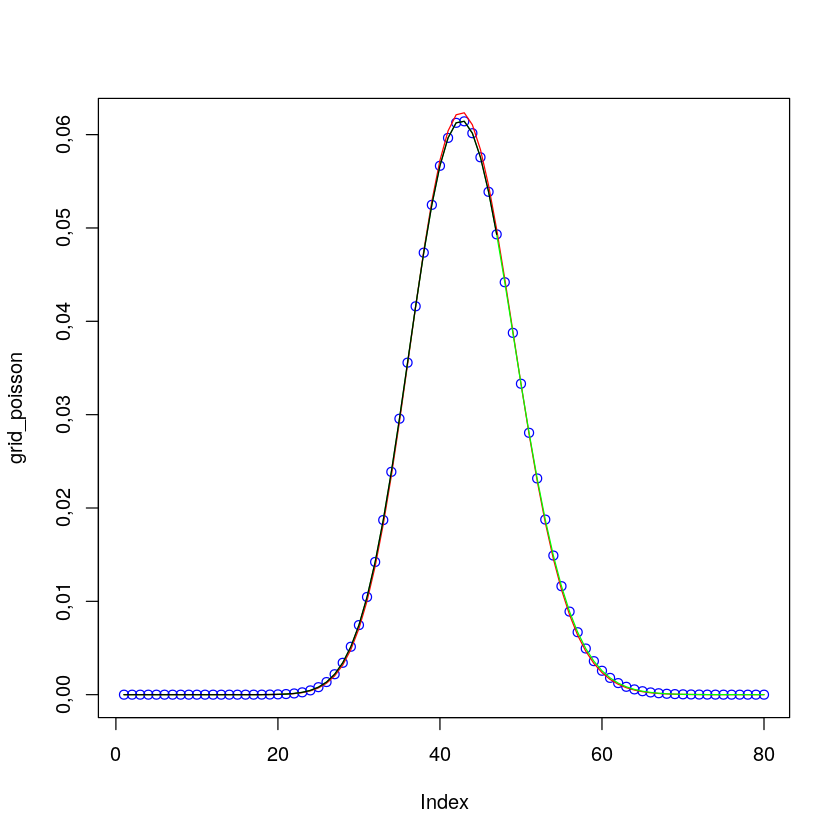

In [158]:
grid_binom_min <- numeric(80)
grid_binom_seg <- numeric(80)
grid_binom_ms <- numeric(80)

for(k in 0:79){
    grid_binom_min[k+1] <- binomialPMF(24*60, p_hat_n100_min, k)
    grid_binom_seg[k+1] <- binomialPMF(24*60*60, p_hat_n100_seg, k)
    grid_binom_ms[k+1] <- binomialPMF(24*60*60*1000, p_hat_n100_ms, k)
}

# Comparo plots
plot(grid_poisson, col='blue')
lines(grid_binom_min, col='red')
lines(grid_binom_seg, col='green')
lines(grid_binom_ms, col='black')

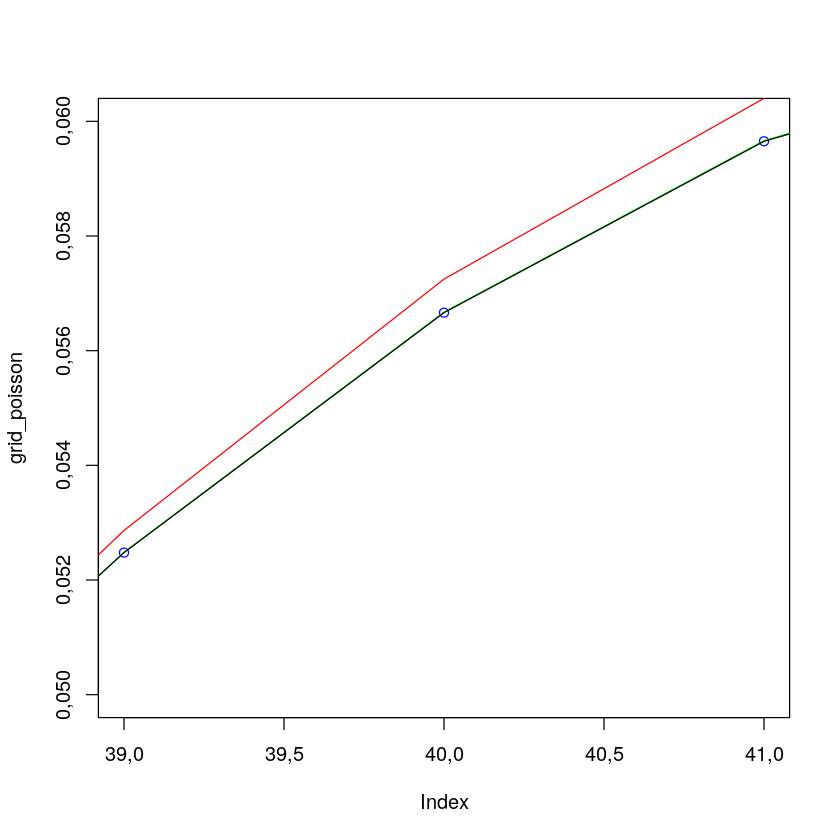

In [159]:
# Comparo plots
plot(grid_poisson, col='blue', xlim=c(39,41), ylim=c(0.05,0.06))
lines(grid_binom_min, col='red')
lines(grid_binom_seg, col='green')
lines(grid_binom_ms, col='black')

**Observación:** Notar cómo los valores de la aproximación binomial más fina, se cortan en $47$

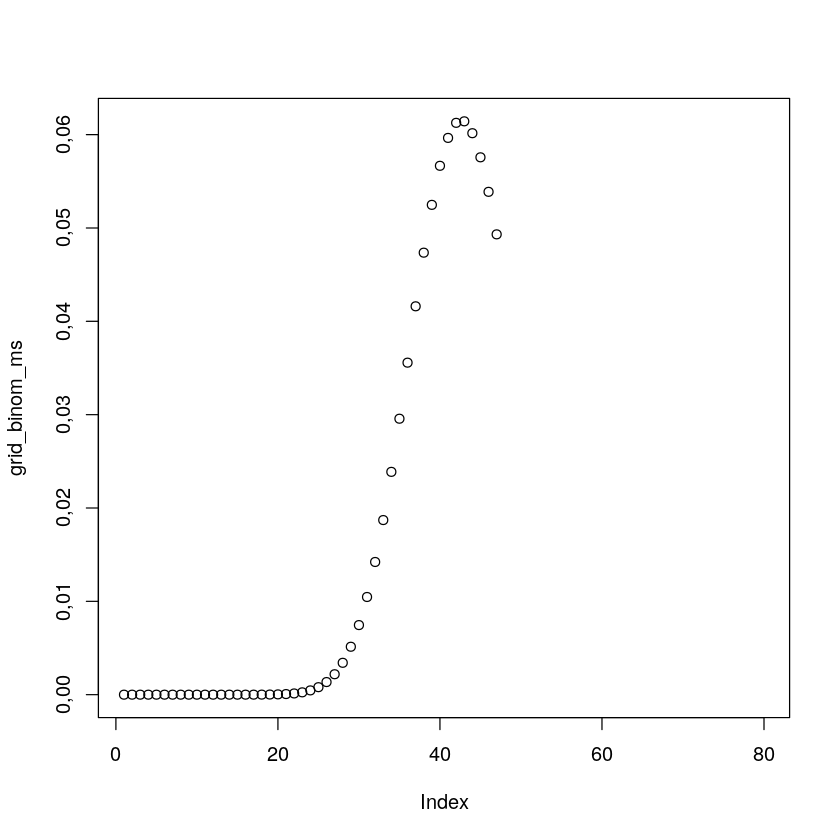

In [163]:
plot(grid_binom_ms, col='black')

In [164]:
binomialPMF(24*60*60*1000, p_hat_n100_ms, 46)

[1] 0,04931861

In [165]:
binomialPMF(24*60*60*1000, p_hat_n100_ms, 47)

[1] Inf

Ésto se debe al cálculo del combinatorio $${86 \, 400 \, 000 \choose 47}$$

In [167]:
choose(24*60*60*1000, 46)

[1] 2,183018e+307

In [168]:
choose(24*60*60*1000, 47)

[1] Inf

Por lo que en caso de necesitar estimar un valor exacto de 47 llamadas o más, no podríamos usar el ajuste en "mili segundo", a menos que guardemos o resolvamos esa componente de una manera más eficiente.

### Go beyond

# PLUS ULTRA

De antes:

$$\hat P(X=k) = {1440 \choose k} \left( \frac {\bar X}{1440}\right)^k \left( 1 - \frac {\bar X}{1440}\right)^{1440-k}$$

Generalizando para cualquier
  
  
*   $n = $ *"Cantidad **total** de intervalos"* (antes $1440$)
  
  
  * $t = $ *"Cantidad de intervalos a **considerar**"*  (antes $1$)
  
  
  * $\hat \theta$ es el **estimador** de $\theta$ (antes $\bar X$)
  
    Donde $\theta$ es el parámetro de ***"frecuencia de llegadas"*** de una $\mathcal Poisson(\theta)$
    

$$\hat P(X=k) = {n \choose k} \left( {\hat \theta} \frac {t}{n}\right)^k \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

El problema de usar variables aleatorias **Bernoulli** para **cada** uno de los **intervalos** se da en que existe una probabilidad de que haya **dos llegadas** (*éxitos*) en **un mismo intervalo**.

$$\hat P(X=k) \neq P("k \ llegadas")$$

En ese caso, el valor de la Bernoulli sería **1**, ignorando que existió **otra llegada** en **ese intervalo**.

Para eso, podemos **reducir el ancho de los intervalos**, o mejor aún, **ver su límite** en cero (infinitos intervalos)

En ese caso, valdría que:

$$\lim_{n \to \infty} \hat P(X=k) = P("k \ llegadas") $$

Demostración:

$$\lim_{n \to \infty} \hat P(X=k) = \lim_{n \to \infty} {n \choose k} \left( {\hat \theta} \frac {t}{n}\right)^k \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

Abro el combinatorio:

$$= \lim_{n \to \infty} {\frac {n!}{(n-k)! k!}} \left( {\hat \theta} \frac {t}{n}\right)^k \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

Distribuyo el exponente $k$:

$$= \lim_{n \to \infty} {\frac {n!}{(n-k)! k!}} \left(  \frac {\left( \hat \theta \ t \right)^k }{n^k}\right) \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

Agrupo $n^k$ con $\frac {n!}{(n-k)!}$

$$= \lim_{n \to \infty} {\frac {n!}{(n-k)! n^k!}} \frac {\left( \hat \theta \ t \right)^k }{k!} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

Veamos que:
$$\lim_{n \to \infty} {\frac {n!}{(n-k)! n^k!}} = \frac {n (n-1) (n-2) \dots  (n-k+1)}{n \ . n \ . n \dots n}$$

Donde puedo sacar factor común $n$ en el numerador, para cada término:

$$\lim_{n \to \infty} {\frac {n!}{(n-k)! n^k!}} = \lim_{n \to \infty}  \frac {n \ . n (1-\frac 1 n) \ n (1-\frac 2 n) \dots  n (1-\frac {k+1} n)}{n \ . n \ . n \dots n}$$

Simplifico $n$'s:
$$= \lim_{n \to \infty}  \frac {\not n \ . \not n (1-\frac 1 n) \ \not n (1-\frac 2 n) \dots  \not n (1-\frac {k+1} n)}{\not n \ . \not n \ . \not n \dots \not n}$$

$$= \lim_{n \to \infty}  \frac {(1-\frac 1 n) \ (1-\frac 2 n) \dots  (1-\frac {k+1} n)}{1}$$

Donde el límite de todos los términos con $n$ es cero:

$$= \frac {(1) \ (1) \dots  (1)}{1} = 1$$

Volviendo:

$$\lim_{n \to \infty} {\frac {n!}{(n-k)! n^k!}} \frac {\left( \hat \theta \ t \right)^k }{k!} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k} =$$

$$= \lim_{n \to \infty} 1 \frac {\left( \hat \theta \ t \right)^k }{k!} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

Saco el primer término afuera del límite, pues no tiene $n$

$$= \frac {\left( \hat \theta \ t \right)^k }{k!} \lim_{n \to \infty} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

Reescribo último término:

$$= \frac {\left( \hat \theta \ t \right)^k }{k!} \lim_{n \to \infty} \frac {\left( 1 - {\hat \theta} \frac {t}{n}\right)^{n}}{\left( 1 - {\hat \theta} \frac {t}{n}\right)^{k}}$$

$$= \frac {\left( \hat \theta \ t \right)^k }{k!} \frac {\lim_{n \to \infty} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n}}{\lim_{n \to \infty} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{k}}$$

Donde

$$\lim_{n \to \infty} {\left( 1 - {\hat \theta} \frac {t}{n}\right)^{k}} = 1^{k} = 1$$

$$\lim_{n \to \infty} {\left( 1 - {\hat \theta} \frac {t}{n}\right)^{n}} = e^{-\hat\theta t}$$

pues

* $\lim_{n \to \infty} {\left( 1 - \frac {x}{n}\right)^{n}} = e^{-x}$


$$\frac {\left( \hat \theta \ t \right)^k }{k!} \frac {\lim_{n \to \infty} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n}}{\lim_{n \to \infty} \left( 1 - {\hat \theta} \frac {t}{n}\right)^{k}} =$$


$$= \frac {\left( \hat \theta \ t \right)^k }{k!} \frac {e^{-\hat\theta t}}{1}$$

$$= \frac {\left( \hat \theta \ t \right)^k }{k!} e^{-\hat\theta t} $$

Por lo que

$$\lim_{n \to \infty} \hat P(X=k) = \lim_{n \to \infty} {n \choose k} \left( {\hat \theta} \frac {t}{n}\right)^k \left( 1 - {\hat \theta} \frac {t}{n}\right)^{n-k}$$

es lo mismo que:

$$\lim_{n \to \infty} \hat P(X=k) = \frac {\left( \hat \theta \ t \right)^k }{k!} e^{-\hat\theta t}$$

Un **Proceso de Poisson** con **Función de Probabilidad Puntual**:

> $$p_X (k) = \frac {\left( \hat \theta \ t \right)^k }{k!} e^{-\hat\theta t}$$
>
> * $t > 0$
>
> * $k = 0, 1, 2, \dots ,\infty$

Lo que para un tiempo $t_0$ fijo, corresponderá a una $Poisson$ de parámetro $\lambda = \hat \theta \ t_0$

